<div align="left" style="float: left;">
    
###### CC2006 - Inteligência Artificial

</div>

<div align="right" style="float: right;">
    
###### _Robert Gleison dos Reis Pereira (up202200496)_  
###### _Sophia Cheto de Queiroz Fonseca (up202200336)_    
###### _Guilherme Magalhães (up202205505)_  

</div>

####
# Connect4 - Análise

Análise de escolhas e dos algoritmos implementados no projeto




### _Integrantes:_
   
_Robert Gleison dos Reis Pereira (up202200496)_  
_Sophia Cheto de Queiroz Fonseca (up202200336)_    
_Guilherme Magalhães (up202205505)_  

---

# **Análises de Variáveis**

Durante a implementação, precisamos escolher uma boa heurística e uma boa constante de equilíbrio entre Exploitation e Exploration para o MCTS.  
Para isso, rodamos alguns testes para entendermos melhor a performance de cada um.

### **Análise da Heurística**

Inicialmente, estipulamos um valor padrão para a heurística:
```
- Pontuação para 1 peça aliada: 1
- Pontuação para 2 peças aliadas: 10
- Pontuação para 3 peças aliadas: 50
- Pontuação para 4 peças aliadas: 1000

- Pontuação para 1 peça inimiga = -1
- Pontuação para 2 peças inimigas = -10
- Pontuação para 3 peças inimigas = -50
- Pontuação para 4 peças inimigas = -1000
```
Com esses valores, os algoritmos que utilizam a heurística ficaram bons o suficiente para ganhar de um humano comum. Todavia, pretendemos um valor excelente, e para isso executamos testes.



### Testes executados:

Adaptamos o código do jogo para que conseguíssemos executar uma IA contra outra IA. Escolhemos o AlphaBeta com profundidade 4 por se utilizar da heurística. Foi observado que o algoritmo que iniciava o jogo tinha desvantagem sobre o que jogava em segundo lugar, portanto rodamos jogos trocando as posições de início. Além disso, como o AlphaBeta se utiliza de heurísticas e valores não aleatórios, os jogos simulados foram basicamente os mesmos, nas mesmas condições de ambiente.

### Resultados:

**- Aumentar pontuações aliadas:** Foram multiplicadas as pontuações para as peças aliadas com os multiplicadores: 2, 3, 4, 5, 6, 7, 10 e 100, e em cada teste, foram feitos 5 jogos AlphaBeta(heurística padrão) x AlphaBeta(heurística modificada) alterando as ordens de jogada. Em todos os testes, a heurística padrão foi a vencedora. O aumento da recompensa das peças aliadas diminui as chances de impedir jogadas do oponente, portanto, o poder de decisão cai.

**- Aumentar pontuações inimigas** Foram multiplicadas as pontuações para as peças inimigas com os multiplicadores : 2, 3, 4, 5, 6, 7, 10 e 100, e os resultados foram:
* Multiplicador 2: A heurística modificada perdeu os jogos que iniciou e empatou os jogos que começou em segundo.
* Multiplicador 3: A heurística modificada ganhou todos os jogos
* Multiplicador 4: A heurística modificada perdeu os jogos que iniciou e empatou os jogos que começou em segundo.
* Multiplicador 5: A heurística modificada teve eficácia semelhante à padrão. A heurística que jogou em segundo ganhou todos os jogos, independentemente de ser a padrão ou a modificada.
* Multiplicador 6: A heurística modificada teve eficácia semelhante à padrão. A heurística que jogou em segundo ganhou todos os jogos, independentemente de ser a padrão ou a modificada.
* Multiplicador 7: A heurística padrão ganhou todos os jogos, indepentemente de quem inicia.
* Multiplicador 10: A heurística padrão ganhou todos os jogos, indepentemente de quem inicia.
* Multiplicador 100: A heurística padrão ganhou todos os jogos, indepentemente de quem inicia.

Pudemos concluir que os melhores valores de heurística, seriam com a pontuação padrão das peças inimigas multiplicadas por valores próximos de 3, por oferecerem um bom balanceamento entre impedir que o inimigo vença e buscar a vitória aliada. Caso elevemos muito os valores das peças inimigas, a heurística se torna ineficiente por não dar o devido valor em busca a vitória aliada.

```
-Pontuação para 1 peça aliada: 1
-Pontuação para 2 peças aliadas: 10
-Pontuação para 3 peças aliadas: 50
-Pontuação para 4 peças aliadas: 1000

-Pontuação para 1 peça inimiga = -3
-Pontuação para 2 peças inimigas = -30
-Pontuação para 3 peças inimigas = -150
-Pontuação para 4 peças inimigas = -3000
```

---

### **Análise da Constante do MCTS**

<div align="center">
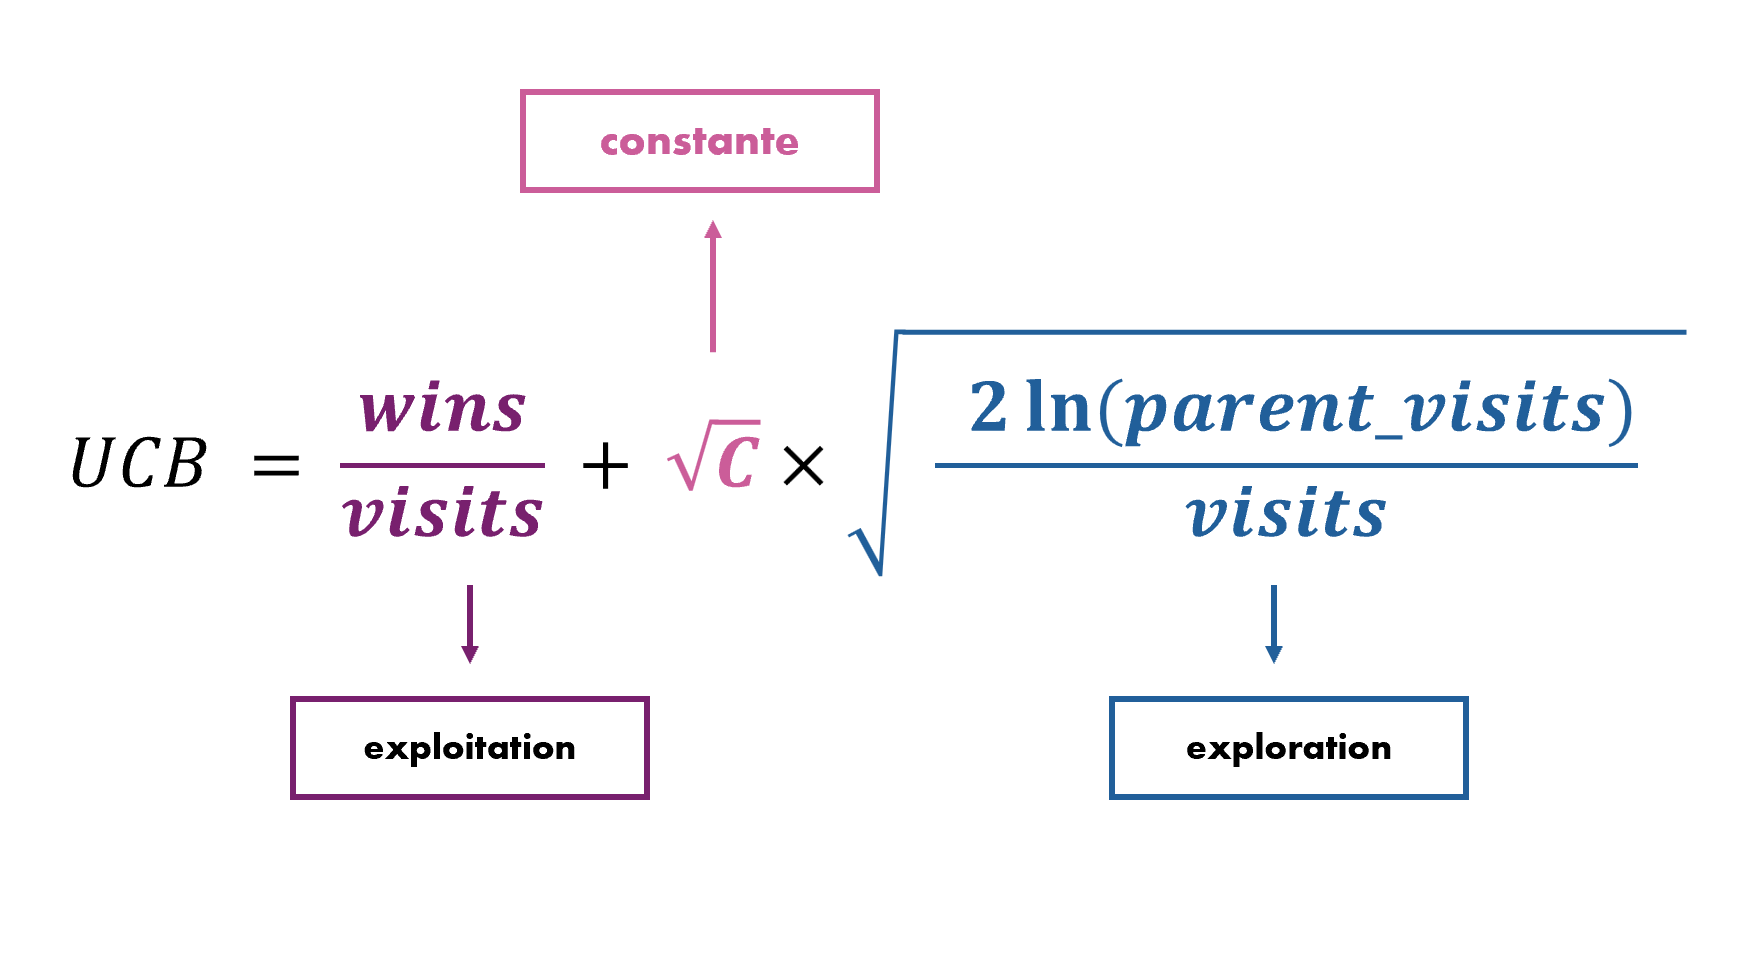
</div>


Durante a escolha dos nós a serem expandidos e simulados, é calculado um valor UCB que depende de uma constante C arbitrária.  
Para escolhermos a melhor constante, fizemos alguns testes com uma série de valores, fazendo o MCTS (com limite de 7 segundos) jogar contra o A* Adversarial. Assim, obtivemos os seguintes resultados:

Dessa forma, foi escolhida a constante = 2 para ser o padrão do algoritmo, uma vez que apresentou a melhor performance.

---

# **Análise dos Algoritmos**

Nessa etapa, efetuamos diversos testes para analisar como cada algoritmo funciona para diferentes casos.  
Utilizamos exemplos reais de estados, simulamos com a jogada da IA e analisamos o porquê de determinada coluna de jogada ter sido escolhida.

**Informações da análise**  
**Peças 1** = Movimentos feitos pelo humano  
**Peças 2** = Movimentos feitos pela IA  
**Estado_inicial** = Tabuleiro após a jogada humana  
**Estado_seguinte** = Tabuleiro após jogada da IA

## Análise do A*:
O A* calcula o score do tabuleiro após cada uma das possíveis jogadas e, então, escolhe a coluna que gerou um score maior.
O A* original é o mais rápido dos algoritmos implementados e tem um tempo de execução quase constante, uma vez que, a cada jogada, realiza apenas o cálculo de 7 versões de tabuleiro. Esse tempo começa a diminuir quando as colunas começam a encher, então são gerados menos tabuleiros para serem calculados.

### Código utilizado:
Na função principal do A*, medimos o tempo de execução com a biblioteca time e printamos as informações de cada coluna considerada:


  #### Análise 1: Início do jogo

Resultado esperado: Espera-se que seja jogada uma peça no meio do tabuleiro, uma vez que, participando de mais segmentos de 4 espaços, conta para um score de heurística maior.

Resultado obtido:


  #### Análise 2: Movimento do A* para ganhar

Resultado esperado: Espera-se que seja jogada uma peça na coluna 3, para que ganhe o jogo.

Resultado obtido:

Assim como o esperado, a jogada foi feita na coluna 3, pois o A* interpreta uma jogada vitoriosa como um grande avanço no seu score, que é o critério de escolha para as suas jogadas.  
Aqui, percebe-se como, mesmo com o andamento do jogo quase pela metade, o tempo de execução permanece praticamente o mesmo, como foi mencionado no início.


  #### Análise 3: Movimento do A* para impedir a vitória do oponente

Resultado esperado: Espera-se que a IA jogue na coluna 5, para impedir a vitória do Player 1

Resultado obtido:

Aqui começamos a ver a deficiência do A*. Como ele não calcula a jogada do Player 1 seguinte à jogada que a IA fará, ele não consegue prever, nem tentar atrapalhar o jogo do oponente, a não ser que isso o beneficie em forma de heurística.  
Nesse caso, completar uma sequência própria de 3 peças dá mais pontos à heurística (final = 8) do que atrapalhar a sequência de peças em formação do Player 1 (final = -5). Logo, a primeira opção é a escolhida.

### Conclusões sobre o A*  

Apesar de se desempenhar relativamente bem ao tentar acumular pontos para si, o A* não é capaz de atrapalhar uma jogada do oponente se isso não gerar um benefício próprio em termos de heurística.

Como não consegue prever uma jogada do oponente, o A* não é um algoritmo ideal para ser utilizado em jogos adversariais. Assim, resolvemos criar uma versão de A* que tente se adaptar a um jogo adversarial, que será mostrado a seguir.

---

## Análise do A* Adversarial:

Enquanto o A* original vê apenas uma jogada à sua frente, o A* adversarial consegue ver duas. 
Em resumo, esse algoritmo simula todas as jogadas possíveis para a IA, partindo do estado atual, e calcula a melhor jogada do adversário para cada uma delas. Ao final, de acordo com o score gerado após essas duas jogadas (da IA e do oponente), é escolhido o que retorna o maior valor. Ou seja, é escolhida a jogada que mais beneficia a IA num range de 2 jogadas.
Assim, o jogo consegue prever uma reação direta do adversário, conseguindo impedir a sua vitória iminente.

Dessa maneira, o jogo se torna realmente mais "jogável" e é necessário realmente um pouco mais de raciocínio do jogador para ganhar.  
Em termos de tempo de execução, o A* adversarial demora cerca de 7 vezes mais que o A* original, uma vez que o próprio A* é chamado 7 vezes dentro dessa nova função.




### Código utilizado


  #### Análise 1: Início do jogo

Assim como o esperado, o A* adversarial se comporta, incialmente, como o A* original.


  #### Análise 2: Movimentação para ganhar

Score da coluna 1: score 3
Melhor jogada do oponente a seguir: 5
Score da coluna 2: score 12
Melhor jogada do oponente a seguir: 5
Score da coluna 3: score 6
Melhor jogada do oponente a seguir: 5
Score da coluna 4: score 48
Melhor jogada do oponente a seguir: 5
Score da coluna 5: score 1190
Melhor jogada do oponente a seguir: 3
Score da coluna 6: score 3
Melhor jogada do oponente a seguir: 5
Score da coluna 7: score 3
Melhor jogada do oponente a seguir: 5
Tempo: 0.005759477615356445

Até então, sem novidades. Age como o A* original, mais uma vez, pois sempre escolhe a heurística com maior valor.


  #### Análise 3: Impedir a vitória do oponente

Nessa etapa, essa nova versão começa a se distinguir da anterior. Em todos os casos em que a IA escolha não jogar na 6a coluna, a melhor jogada seguinte para o humano é a na coluna 6, que o leva à vitória. Dessa forma, todos os scores ficam extremamente negativos, menos na coluna em que é possível impedir a vitória do oponente.


  #### Análise 4: Escolher entre ganhar e impedir vitória

Devido à checagem de vitória adicionada, ao passar pela simulação da coluna 3, a função já retorna diretamente o valor da coluna que levou à vitória.  
Sem essa checagem, a IA procuraria a melhor jogada do oponente após a jogada da IA na coluna 3 e a vitória do oponente a seguir diminuiria o valor da heurística desse movimento, fazendo essa opção ser descartada. Então, a IA escolheria jogar na coluna 5, dando prioridade a impedir a vitória do oponente.


### Conclusões sobre o A* Adversarial

Com esse algoritmo, já é possível jogar contra a IA, porém ela não consegue elaborar jogadas mais complexas, que visam uma sequência de jogadas específica que leve a uma vitória. 
Para isso, seria necessário explorar os níveis seguintes dessa árvore, chamando recursivamente as funções utilizadas. No entanto, a cada chamada adicionada, o tempo de execução seria multiplicado por 7, gerando uma tendência exponencial à medida que mais níveis fossem explorados.
Uma forma mais eficiente de fazer essa exploração é com o algoritmo Alpha Beta Pruning, que foi implementado e será analisado a seguir.

---

## Análise do AlphaBeta:
Normalmente, o AlphaBeta com 4 níveis de profundidade é o suficiente para ganhar de um humano comum. Observa-se o número médio de nós percorridos é bem maior do que quando utilizamos uma profundidade de 3, e bem menor que uma profundidade de 5. Isso se deve à natureza do AlphaBeta, de ser um grafo em forma de àrvore. O tempo de execução é correlacionado com o número de nós percorridos. A capacidade de decisão de uma profundidade de 4 é bem maior que uma profundidade de 3, porém, em compensação, aumenta-se o tempo de execução.

Ou seja, quanto maior o limite, melhor e mais demorada fica a resposta. 



### Código utilizado:
Na função principal do AlphaBeta, medimos o tempo de execução com a biblioteca time, e os nós percorridos com uma variável global que recebe +1 em cada visita da função calculate() a um nó.


  #### Analise 1: Início do jogo

Resultado esperado: No estado_inicial, é lógico que as colunas do meio possuem mais maneiras de formar segmentos de 4 peças e ganhar o jogo. Queremos que o AlphaBeta jogue na coluna 4.

Resultado obtido: 

Resultado esperado igual ao resultado obtido. O AlphaBeta conseguiu visualizar o que queriamos e jogou no meio através de uma avaliação com scores da heurística.
A partir da profundidade 3, o número de nós efetivamente percorridos já passa a ser muito menor do que o número de nós existentes na árvore com tal profundidade, devido ao prunning das branches que não nos interessam.

#### Analise 2: Movimento do AlphaBeta para ganhar

Resultado esperado: No estado_inicial, o AlphaBeta tem a possibilidade de ganhar o jogo na coluna 2 com uma linha vertical de 4 peças. Queremos que ele jogue na coluna 2.

Resultado obtido:

Resultado esperado igual ao resultado obtido. AlphaBeta jogou na coluna 2 e ganhou o jogo.  
Como foi adicionada uma checagem de possíveis vitórias imediatas, a execução é interrompida ao checar a jogada na coluna 2. Então o score das colunas seguintes não é calculado.

#### Analise 3: Movimento do AlphaBeta para impedir o oponente de ganhar

Resultado esperado: No estado_inicial, podemos ganhar o jogo caso joguemos na coluna 2 na próxima rodada. Queremos que ele nos impeça de ganhar na coluna 2.

Resultado obtido:

Resultado esperado igual ao resultado obtido. O AlphaBeta conseguiu ver a possibilidade e nos impediu, como esperado. O número de nós foi menor que o normal (em comparação, por exemplo, com a jogada inicial mostrada acima), assim como o tempo de resposta, devido ao fato do valor de score máximo estar na segunda coluna. Assim, os prunes puderam ser feitos nas colunas subsequentes.

#### Analise 4: Situação de vitória ou derrota

Resultado esperado: No estado_inicial, o AlphaBeta está numa situação de que ele tem que escolher entre ganhar se jogar na coluna 3, ou nos impedir de ganhar na próxima rodada jogando na coluna 2. Queremos que ele opte por ganhar, na coluna 3.

Resultado obtido:

Resultado esperado igual ao resultado obtido. Podemos perceber que a coluna 2 também é considerada uma boa jogada, pois tem uma pontuação positiva, mas a jogada para ganhar sempre será priorizada, inclusive interrompendo a busca por outras possibilidades. Assim, o tempo e os nós percorridos foram muito menores.

### Conclusões sobre o Alpha Beta:

Esse algoritmo, em todos os nossos testes, foi perfeitamente suficiente para jogar contra um humano, mesmo que ele tente elaborar uma estratégia mais complexa, que envolva uma sequência de jogadas.  
Infelizmente, esse algoritmo precisa de um limite de níveis a serem explorados, para que o tempo de execução seja viável de ser aplicado numa interação com um humano. Assim, mesmo atuando como uma forma eficaz de criação da árvore, ainda não é possível explorá-la até a sua profundidade máxima.  
Para esse tipo de abordagem, com o intuito de explorar melhor a profundidade da árvore, foi implementado o Monte Carlo Tree Search, a seguir.

## Análise do MCTS:

Num geral, o MCTS com 3 segundos como limite já o é o suficiente para ganhar de humanos comuns, mas sofre um pouco com outros algorítmos adversáriais, como o AlphaBeta e o A* Adversarial. Para esse teste, estamos jogando contra o MCTS com 3 e 6 segundos de limite e utilizando a constante = raiz de 2, para balanceamento entre Exploitation and Exploration.


**Vitórias:** Número de vitórias da IA que partiam desse nó  
**Total:** Número de jogos simulados com esse nó  
**Pontuação:** Pontuação UCB do nó  
**Probabilidade de vitória:** Vitórias / Visitas

### Código utilizado:

Adicionamos à classe *Node* a função *str* abaixo. Assim, ao fim da execução de uma rodada, printamos as seguintes informações sobre cada jogada possível a ser feita.  

### MCTS - 3 segundos:


  #### Analise 1: Início do jogo

Resultado esperado: No estado_inicial apresentado, é suposto que o MCTS tenda a jogar nas posições do meio devido à uma maior facilidade de gerar segmentos de 4 peças identicas em diversas posições. Nós, como jogadores, escolhemos a coluna com maior probabilidade de gerar combinações, a coluna 4.

Resultado obtido:

Resultado esperado igual ao resultado obtido. Baseado na probabilidade de vitória, o estado escolhido foi o 5, com a maior probabilidade de vitória = 0.31216, e está relacionado à coluna 5. Resultado dentro do esperado, pois jogou em colunas centrais.

#### Análise 2: Movimento do MCTS para ganhar

Resultado esperado: No estado_inicial, temos o jogo mais avançado e o MCTS tem uma possibilidade de ganhar caso jogue na coluna 3, fazendo uma diagonal de peças. Queremos que ele jogue na coluna 3.

Resultado obtido:

Resultado obtido igual ao esperado. Baseado na probabilidade de vitória, o estado escolhido foi o 3, com a maior probabilidade de vitória = 1.0, e está relacionado à coluna 3. O MCTS ganhou o jogo.


#### Análise 3: Movimento do MCTS para impedir o oponente de ganhar

Resultado esperado: No estado_inicial, nosso grupo tem a possibilidade de vencer o jogo na próxima rodada com uma diagonal, jogando na coluna 5. Queremos que o MCTS não permita isso e jogue na coluna 5.

Resultado obtido:

Resultado esperado igual ao resultado obtido. O MCTS escolheu a coluna 5 para evitar que ganhemos. O nó filho relacionado à coluna 5 retorna a maior probabilidade de vitória = 0.8443305573350416. 



#### Análise 4: Situação de vitória ou derrota

Resultado esperado: No estado_inicial, o MCTS tem 2 escolhas, ganhar o jogo nas colunas 3 ou 7, ou nos impedir de ganhar jogando na coluna 4. Queremos que ele jogue nas colunas 3 ou 7 para que ganhe.

Resultado obtido:

Resultado esperado igual ao resutlado obtido. O MCTS descobriu que as chances de vitória ao se jogar na coluna 3 e 7 são de 100%. Nota-se que a probabilidade de jogar na coluna 4 também é boa para ele, com probabilidade de vitória de 0.6713906111603188. O MCTS conseguiu ganhar nessa situação escolhendo a coluna 7.



### MCTS - 6 segundos:


  #### Analise 1: Início do jogo

Resultado esperado: No estado_inicial apresentado, é suposto que o MCTS tenda a jogar nas posições do meio devido a uma maior facilidade de gerar segmentos de 4 peças idênticas em diversas posições. Queremos que ele jogue nas colunas centrais.

Resultado obtido:

Resultado esperado igual ao resultado obtido. O MCTS optou por jogar na coluna do meio, algo já esperado, visto que a coluna do meio é a que possui mais opções de combinações de segmentos de 4, e a que obteve mais vitórias nas simulações = 0.44983818770226536.


#### Análise 2: Movimento do MCTS para ganhar

Resultado esperado: No estado_inicial, o MCTS se encontra numa situação em que ele consegue ganhar caso jogue na coluna 3, realizando uma diagonal. Queremos que ele jogue na coluna 3.

Resultado obtido:

Resultado obtido igual ao resultado esperado. O MCTS conseguiu ver a coluna 3 como possibilidade de vitória e ganhou o jogo. A coluna 3 possuia a maior probabilidade de vitória = 1.0.


#### Análise 3: Movimento do MCTS para impedir o oponente de ganhar

                  
Resultado esperado: No estado_inicial, apenas 6 filhos existem, pois a coluna 4 está cheia. Nosso grupo consegue ganhar o jogo ao jogar na coluna 2, tanto verticalmente como na diagonal. Queremos que o MCTS nos impeça e jogue na coluna 3.

Resultado obtido:


Resultado esperado igual ao resultado obtido. O MCTS conseguiu nos impedir jogando na coluna 2. A probabilidade do MCTS ganhar o jogo era maior caso ele nos impedisse na coluna 2. Probalidade de vitória = 0.9334382729930291.


#### Análise 4: Situação de vitória ou derrota

Resultado esperado: No estado_inicial, nosso grupo pode ganhar na próxima rodada jogando na coluna 6, e o MCTS pode ganhar na próxima jogada, jogando na coluna 1. Queremos que ele jogue na coluna 1 e ganhe, ao invés de nos impedir.

Resultado obtido:

Resultado esperado igual ao resultado obtido. O MCTS ganhou o jogo escolhendo a coluna 1 com probabilidade de vitória = 1.0. Vale notar que a probabilidade de jogar na coluna 6 foi de 0.9924312635156008, ou seja, caso nos impedisse de ganhar, a chance de ganhar o jogo ainda continuaria alta. Mas optou por ganhar de uma vez.
 

### Conclusões sobre o MCTS

Esse algoritmo apresentou um ótimo desempenho quando executado com um alto limite de tempo, porém a experiência interativa com o jogador é prejudicada devido ao delay de cada jogada. Assim, optamos em tornar os 6 segundos de execução como padrão.  
Também com o intuito de melhorar a experiência do usuário, foi adicionada uma checagem de vitória para os filhos diretos do estado atual, semelhante ao utilizado no A* Adversarial e no AlphaBeta. Dessa forma, se alguma das jogadas levar diretamente à vitória, ela será já escolhida sem executar as simulações, o que diminui o tempo de execução do algoritmo para a jogada final.

Foi também observado que, algumas vezes, o jogo atinge um estado em que não há muitas opções de jogadas a serem feitas e termina entregando a vitória ao oponente. Ao analisarmos os exemplos, foi percebido que, na maior parte deles, já não havia mais chance de vitória para o MCTS, o que o levava a desistir do jogo em vez de postergar a sua derrota. 

## Simulação MCTS (Tempo)

Para analisar a evolução da performance do MCTS de acordo com o seu tempo limite de execução, resolvemos simular diversar partidas, mudando o tempo limite de cada uma. Colocamos o MCTS para jogar contra o A* Adversarial, que é o algoritmo que mais se assemelha ao pensamento humano, pois faz a sua escolha visando a sua própria vitória e impedir a vitória do oponente na jogada seguinte.

De acordo com os dados obtidos nas simulações, o MCTS tem a sua melhor performance a partir dos 7 segundos. 

# Conclusão

Ao fim do projeto, chegamos às seguintes conclusões quanto aos algoritmos:  
- **A\***: por não ser um algoritmo adversarial, não consegue diretamente impedir a vitória do oponente. Logo, não se adequa à proposta do jogo;
- **A\* adversarial**: já é funcional e joga bem contra um humano médio, porém não consegue elaborar jogadas complexas nem prever estratégias a longo do prazo do oponente. Por outro lado, seu tempo de execução é mínimo, então as partidas são bem dinâmicas
- **Alpha Beta Pruning**: consegue criar partidas mais elaboradas e um jogo bem interessante contra o humano. O seu tempo de execução aumenta muito à medida que a sua pesquisa é mais elaborada, mas foi possível encontrar uma produndidade de níveis explorados que gere um bom equilíbrio entre o seu funcionamento e o seu tempo de execução.
- **Monte Carlo Tree Search**: foi o algoritmo com melhor performance em jogo, porém a custo de um tempo de execução muito elevado. Assim, com o tempo escolhido para uma melhor interação com o usuário, não performa tão bem quanto o Alpha Beta.